# Some regularizations on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset
By [Zahra Taheri](https://github.com/zahta), November 5, 2020

### Preperation for Google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#unzip dataset files from google drive to content folder in colab

import os

if os.path.exists("/content/cifar-10-batches-py/")==False:
  print("unzip files!")
  !unzip -q "/content/drive/My Drive/cifar-10-batches-py.zip"

mypath="/content/cifar-10-batches-py/"

unzip files!


In [3]:
#Define path to the directory
 
os.chdir(mypath)

print(os.getcwd())

/content/cifar-10-batches-py


### Import libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

import os

np.random.seed(100)

## Loading CIFAR-10

In [5]:
%run load_cifar10.py

In [6]:
#Define path to the directory
 
os.chdir("/content/")

print(os.getcwd())

/content


In [7]:
cifar_10_dir = 'cifar-10-batches-py'
train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
load_cifar_10_data(cifar_10_dir)
print("Train data: ", train_data.shape)
print("Train filenames: ", train_filenames.shape)
print("Train labels: ", train_labels.shape)
print("Test data: ", test_data.shape)
print("Test filenames: ", test_filenames.shape)
print("Test labels: ", test_labels.shape)
print("Label names: ", label_names.shape)

Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


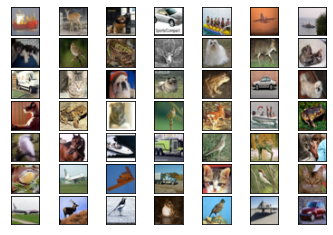

In [8]:
# display some random training images
num_plot = 7
f, ax = plt.subplots(num_plot, num_plot)
for m in range(num_plot):
    for n in range(num_plot):
        idx = np.random.randint(0, train_data.shape[0])
        ax[m, n].imshow(train_data[idx])
        ax[m, n].get_xaxis().set_visible(False)
        ax[m, n].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0.1)
f.subplots_adjust(wspace=0)
plt.show()

## Preparation of the dataset

In [9]:
#nsamples1, a1,b1,c1 = train_data.shape
#X_train= train_data.reshape((nsamples1,a1*b1*c1))
#nsamples2, a2,b2,c2 = test_data.shape
#X_test= test_data.reshape((nsamples2,a2*b2*c2))

# Data standardization
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test= scaler.transform(X_test)

#train_data = X_train.reshape((nsamples1, a1,b1,c1))
#test_data= X_test.reshape((nsamples2, a2,b2,c2))

In [10]:
import torch
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.Tensor(train_data) # transform to torch tensor
tensor_y = torch.Tensor(train_labels)
tensor_y = tensor_y.type(torch.LongTensor)

train_dataset = TensorDataset(tensor_x,tensor_y) # create your dataset

In [11]:
tensor_x2 = torch.Tensor(test_data)
tensor_y2 = torch.Tensor(test_labels)
tensor_y2 = tensor_y2.type(torch.LongTensor)

test_dataset = TensorDataset(tensor_x2,tensor_y2)

In [12]:
tensor_y

tensor([6, 9, 9,  ..., 9, 1, 1])

## Building Feedforward Neural Networks with PyTorch

In [13]:
# import libraries
import torch
import torch.nn as nn

from torch.autograd import Variable
from torchsummary import summary

## L2 regularization

### Model B: 3 Hidden Layers Feedforward Neural Network (ReLU Activation)

#### Make dataset iterable

In [14]:
batch_size = 128
n_iters = 5000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

12


In [15]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False) # create your dataloader

### Create model class

In [16]:
class FeedforwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedforwardNeuralNetworkModel, self).__init__()
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # non-linearity 1
        self.relu1 = nn.ReLU()
        
        # linear function 2
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # non-linearity 2
        self.relu2 = nn.ReLU()
        
        # linear function 3
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # non-linearity 3
        self.relu3 = nn.ReLU()
        
        # linear function 4 (readout)
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non-linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non-linearity 2
        out = self.relu2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non-linearity 3
        out = self.relu3(out)
        
        #linear function 4 (readout)
        out = self.fc4(out)
        return out       
    

In [17]:
#  Instantiate model class
input_dim = 3*32*32
output_dim = 10
hidden_dim = 700 

model = FeedforwardNeuralNetworkModel(input_dim, hidden_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()
    

In [18]:
summary(model, (1,3*32*32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 700]       2,151,100
              ReLU-2               [-1, 1, 700]               0
            Linear-3               [-1, 1, 700]         490,700
              ReLU-4               [-1, 1, 700]               0
            Linear-5               [-1, 1, 700]         490,700
              ReLU-6               [-1, 1, 700]               0
            Linear-7                [-1, 1, 10]           7,010
Total params: 3,139,510
Trainable params: 3,139,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.03
Params size (MB): 11.98
Estimated Total Size (MB): 12.02
----------------------------------------------------------------


In [19]:
#  Instantiate loss class
criterion=nn.CrossEntropyLoss()

#  Instantiate optimizer class
learning_rate = 0.001
LAMBDA = 0.09
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

#### Train the model with L2 regularization

In [20]:
# Train the model

train_loss = []
train_accuracy = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    # Calculate Accuracy         
    correct_1 = 0
    total_1 = 0
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 3*32*32).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        '''
        Save accuracy to draw accuracy curve
        '''
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
                
        # Total number of labels
        total_1 += labels.size(0)
           
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        # Total correct predictions
        if torch.cuda.is_available():
                    correct_1 += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
        else:                
                    correct_1 += (predicted == labels).sum()
            
        accuracy = 100 * correct_1 // total_1
        train_accuracy.append(accuracy)
        ''''''
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 3*32*32).cuda())
                else:
                    images = Variable(images.view(-1, 3*32*32))    
                    
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500. Loss: 1.7539598941802979. Accuracy: 36
Iteration: 1000. Loss: 1.7493345737457275. Accuracy: 40
Iteration: 1500. Loss: 1.5100263357162476. Accuracy: 42
Iteration: 2000. Loss: 1.5762542486190796. Accuracy: 45
Iteration: 2500. Loss: 1.525658369064331. Accuracy: 45
Iteration: 3000. Loss: 1.6251555681228638. Accuracy: 42
Iteration: 3500. Loss: 1.41549813747406. Accuracy: 45
Iteration: 4000. Loss: 1.2940051555633545. Accuracy: 48
Iteration: 4500. Loss: 1.4799561500549316. Accuracy: 48


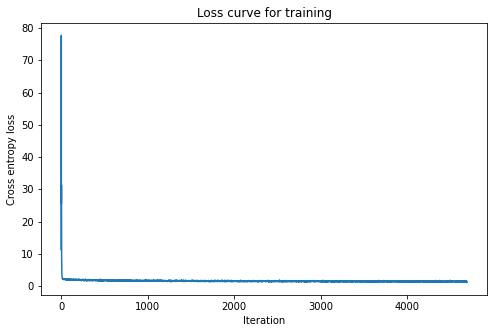

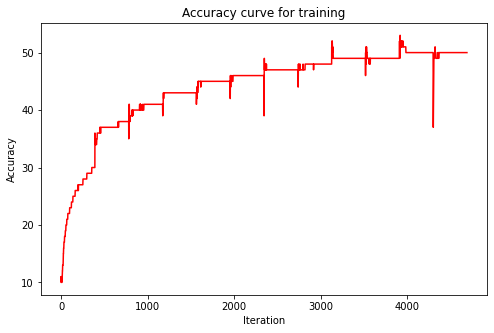

In [21]:
#Plots the loss and accuracy curves

plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("Cross entropy loss")
plt.title("Loss curve for training")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(train_accuracy)), train_accuracy, c='r')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy curve for training")
plt.show()

In [22]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network_pytorch_B_l2.pkl')# only save parameters

### Model C: 3 Hidden Layers Feedforward Neural Network (ReLU and LeakyReLU Activation functions)

#### Make dataset iterable

In [23]:
batch_size = 128
n_iters = 8000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [24]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False) # create your dataloader

### Create model class

In [25]:
class FeedforwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2,hidden_size3, num_classes):
        super(FeedforwardNeuralNetworkModel, self).__init__()
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # non-linearity 1
        self.relu1 = nn.LeakyReLU()
        
        # linear function 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # non-linearity 2
        self.relu2 = nn.LeakyReLU()
        
        # linear function 3
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        # non-linearity 3
        self.relu3 = nn.ReLU()
        
        # linear function 4 (readout)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non-linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non-linearity 2
        out = self.relu2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non-linearity 3
        out = self.relu3(out)
        
        #linear function 4 (readout)
        out = self.fc4(out)
        return out       
    

In [26]:
#  Instantiate model class
input_dim = 3*32*32
output_dim = 10
hidden_dim1 = 700
hidden_dim2 = 1200
hidden_dim3 = 512 

model = FeedforwardNeuralNetworkModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()
    

In [27]:
summary(model, (1,3*32*32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 700]       2,151,100
         LeakyReLU-2               [-1, 1, 700]               0
            Linear-3              [-1, 1, 1200]         841,200
         LeakyReLU-4              [-1, 1, 1200]               0
            Linear-5               [-1, 1, 512]         614,912
              ReLU-6               [-1, 1, 512]               0
            Linear-7                [-1, 1, 10]           5,130
Total params: 3,612,342
Trainable params: 3,612,342
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 13.78
Estimated Total Size (MB): 13.83
----------------------------------------------------------------


In [28]:
#  Instantiate loss class
criterion=nn.CrossEntropyLoss()

#  Instantiate optimizer class
learning_rate = 0.001
LAMBDA = 0.08
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

#### Train the model with L2 regularization

In [29]:
# Train the model

train_loss = []
train_accuracy = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    # Calculate Accuracy         
    correct_1 = 0
    total_1 = 0
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 3*32*32).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        '''
        Save accuracy to draw accuracy curve
        '''
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
                
        # Total number of labels
        total_1 += labels.size(0)
           
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        # Total correct predictions
        if torch.cuda.is_available():
                    correct_1 += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
        else:                
                    correct_1 += (predicted == labels).sum()
            
        accuracy = 100 * correct_1 // total_1
        train_accuracy.append(accuracy)
        ''''''
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 3*32*32).cuda())
                else:
                    images = Variable(images.view(-1, 3*32*32))    
                    
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500. Loss: 1.7303690910339355. Accuracy: 38
Iteration: 1000. Loss: 1.643157720565796. Accuracy: 42
Iteration: 1500. Loss: 1.826537847518921. Accuracy: 42
Iteration: 2000. Loss: 1.3685389757156372. Accuracy: 45
Iteration: 2500. Loss: 1.6073487997055054. Accuracy: 45
Iteration: 3000. Loss: 1.474493145942688. Accuracy: 44
Iteration: 3500. Loss: 1.4686329364776611. Accuracy: 45
Iteration: 4000. Loss: 1.5558935403823853. Accuracy: 48
Iteration: 4500. Loss: 1.352967619895935. Accuracy: 49
Iteration: 5000. Loss: 1.370536208152771. Accuracy: 49
Iteration: 5500. Loss: 1.4908299446105957. Accuracy: 48
Iteration: 6000. Loss: 1.530350923538208. Accuracy: 49
Iteration: 6500. Loss: 1.245059847831726. Accuracy: 51
Iteration: 7000. Loss: 1.2751532793045044. Accuracy: 50
Iteration: 7500. Loss: 1.3628352880477905. Accuracy: 50


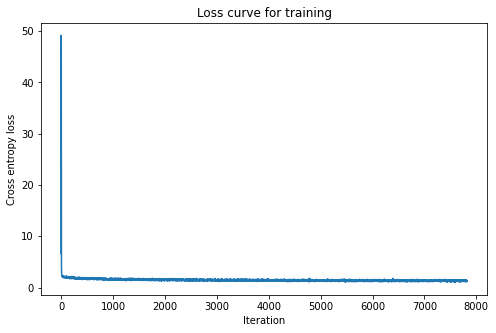

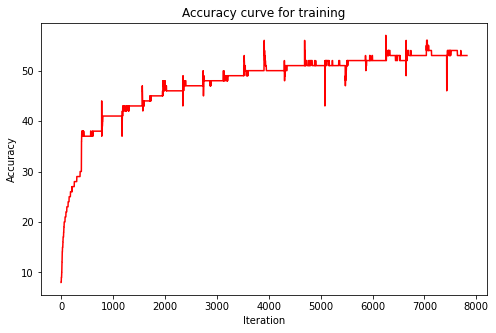

In [30]:
#Plots the loss and accuracy curves

plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("Cross entropy loss")
plt.title("Loss curve for training")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(train_accuracy)), train_accuracy, c='r')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy curve for training")
plt.show()

In [31]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network_pytorch_C_l2.pkl')# only save parameters

### Model D: 3 Hidden Layers Feedforward Neural Network

#### Make dataset iterable

In [32]:
batch_size = 128
n_iters = 8000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [33]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False) # create your dataloader

### Create model class

In [34]:
class FeedforwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2,hidden_size3, num_classes):
        super(FeedforwardNeuralNetworkModel, self).__init__()
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # non-linearity 1
        self.relu1 = nn.LeakyReLU()
        
        # linear function 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # non-linearity 2
        self.relu2 = nn.LeakyReLU()
        
        # linear function 3
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        # non-linearity 3
        self.relu3 = nn.LeakyReLU()
        
        # linear function 4 (readout) 
        self.fc4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non-linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non-linearity 2
        out = self.relu2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non-linearity 3
        out = self.relu3(out)
        
        #linear function 4 (readout)
        out = self.fc4(out)
        return out       
    

In [35]:
#  Instantiate model class
input_dim = 3*32*32
output_dim = 10
hidden_dim1 = 1530
hidden_dim2 = 768
hidden_dim3 = 384 

model = FeedforwardNeuralNetworkModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()
    

In [36]:
summary(model, (1,3*32*32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1530]       4,701,690
         LeakyReLU-2              [-1, 1, 1530]               0
            Linear-3               [-1, 1, 768]       1,175,808
         LeakyReLU-4               [-1, 1, 768]               0
            Linear-5               [-1, 1, 384]         295,296
         LeakyReLU-6               [-1, 1, 384]               0
            Linear-7                [-1, 1, 10]           3,850
Total params: 6,176,644
Trainable params: 6,176,644
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 23.56
Estimated Total Size (MB): 23.61
----------------------------------------------------------------


In [37]:
#  Instantiate loss class
criterion=nn.CrossEntropyLoss()

#  Instantiate optimizer class
learning_rate = 0.001
LAMBDA = 0.09
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

#### Train the model with L2 regularization

In [38]:
# Train the model

train_loss = []
train_accuracy = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    # Calculate Accuracy         
    correct_1 = 0
    total_1 = 0
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 3*32*32).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        '''
        Save accuracy to draw accuracy curve
        '''
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
                
        # Total number of labels
        total_1 += labels.size(0)
           
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        # Total correct predictions
        if torch.cuda.is_available():
                    correct_1 += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
        else:                
                    correct_1 += (predicted == labels).sum()
            
        accuracy = 100 * correct_1 // total_1
        train_accuracy.append(accuracy)
        ''''''
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 3*32*32).cuda())
                else:
                    images = Variable(images.view(-1, 3*32*32))    
                    
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500. Loss: 1.5393329858779907. Accuracy: 40
Iteration: 1000. Loss: 1.4668242931365967. Accuracy: 44
Iteration: 1500. Loss: 1.525287389755249. Accuracy: 43
Iteration: 2000. Loss: 1.4556077718734741. Accuracy: 45
Iteration: 2500. Loss: 1.4560831785202026. Accuracy: 44
Iteration: 3000. Loss: 1.5294266939163208. Accuracy: 48
Iteration: 3500. Loss: 1.3874226808547974. Accuracy: 48
Iteration: 4000. Loss: 1.5949963331222534. Accuracy: 45
Iteration: 4500. Loss: 1.2141120433807373. Accuracy: 46
Iteration: 5000. Loss: 1.3116105794906616. Accuracy: 49
Iteration: 5500. Loss: 1.1062796115875244. Accuracy: 48
Iteration: 6000. Loss: 1.3342280387878418. Accuracy: 49
Iteration: 6500. Loss: 1.4021713733673096. Accuracy: 50
Iteration: 7000. Loss: 1.363921046257019. Accuracy: 49
Iteration: 7500. Loss: 1.2847567796707153. Accuracy: 51


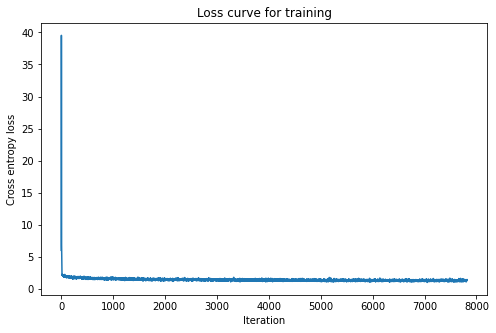

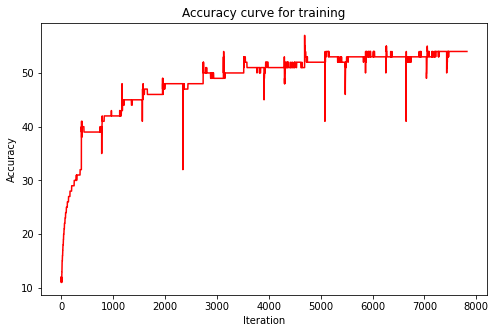

In [39]:
#Plots the loss and accuracy curves

plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("Cross entropy loss")
plt.title("Loss curve for training")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(train_accuracy)), train_accuracy, c='r')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy curve for training")
plt.show()

In [40]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network_pytorch_D_l2.pkl')# only save parameters

### Model E: 5 Hidden Layers Feedforward Neural Network (ReLU Activation)

#### Make dataset iterable

In [41]:
batch_size = 128
n_iters = 8000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [42]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False) # create your dataloader

### Create model class

In [43]:
class FeedforwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2,hidden_size3,hidden_size4,hidden_size5, num_classes):
        super(FeedforwardNeuralNetworkModel, self).__init__()
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # non-linearity 1
        self.relu1 = nn.LeakyReLU()
        
        # linear function 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # non-linearity 2
        self.relu2 = nn.ReLU()
        
        # linear function 3
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        # non-linearity 3
        self.relu3 = nn.ReLU()
        
        # linear function 4
        self.fc4 = nn.Linear(hidden_dim3, hidden_dim4)
        # non-linearity 4
        self.relu4 = nn.ReLU()
        
        # linear function 5
        self.fc5 = nn.Linear(hidden_dim4, hidden_dim5)
        # non-linearity 5
        self.relu5 = nn.ReLU()
        
        # linear function 6 (readout)
        self.fc6 = nn.Linear(hidden_dim5, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non-linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non-linearity 2
        out = self.relu2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non-linearity 3
        out = self.relu3(out)
        
        # linear function 4
        out = self.fc4(out)
        # non-linearity 4
        out = self.relu4(out)
        
        # linear function 5
        out = self.fc5(out)
        # non-linearity 5
        out = self.relu5(out)
        
        #linear function 6 (readout)
        out = self.fc6(out)
        return out       
    

In [44]:
#  Instantiate model class
input_dim = 3*32*32
output_dim = 10
hidden_dim1 = 1530
hidden_dim2 = 770
hidden_dim3 = 380
hidden_dim4 = 15
hidden_dim5 = 10
model = FeedforwardNeuralNetworkModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, hidden_dim5, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()
    

In [45]:
summary(model, (1,3*32*32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1530]       4,701,690
         LeakyReLU-2              [-1, 1, 1530]               0
            Linear-3               [-1, 1, 770]       1,178,870
              ReLU-4               [-1, 1, 770]               0
            Linear-5               [-1, 1, 380]         292,980
              ReLU-6               [-1, 1, 380]               0
            Linear-7                [-1, 1, 15]           5,715
              ReLU-8                [-1, 1, 15]               0
            Linear-9                [-1, 1, 10]             160
             ReLU-10                [-1, 1, 10]               0
           Linear-11                [-1, 1, 10]             110
Total params: 6,179,525
Trainable params: 6,179,525
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forw

In [46]:
#  Instantiate loss class
criterion=nn.CrossEntropyLoss()

#  Instantiate optimizer class
learning_rate = 0.001
LAMBDA = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

#### Train the model with L2 regularization

In [47]:
# Train the model

train_loss = []
train_accuracy = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    # Calculate Accuracy         
    correct_1 = 0
    total_1 = 0
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 3*32*32).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        '''
        Save accuracy to draw accuracy curve
        '''
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
                
        # Total number of labels
        total_1 += labels.size(0)
           
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        # Total correct predictions
        if torch.cuda.is_available():
                    correct_1 += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
        else:                
                    correct_1 += (predicted == labels).sum()
            
        accuracy = 100 * correct_1 // total_1
        train_accuracy.append(accuracy)
        ''''''
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 3*32*32).cuda())
                else:
                    images = Variable(images.view(-1, 3*32*32))    
                    
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500. Loss: 1.8850622177124023. Accuracy: 31
Iteration: 1000. Loss: 1.6966638565063477. Accuracy: 33
Iteration: 1500. Loss: 1.5543586015701294. Accuracy: 39
Iteration: 2000. Loss: 1.6062960624694824. Accuracy: 39
Iteration: 2500. Loss: 1.784556269645691. Accuracy: 38
Iteration: 3000. Loss: 1.536180019378662. Accuracy: 43
Iteration: 3500. Loss: 1.654930591583252. Accuracy: 46
Iteration: 4000. Loss: 1.4486958980560303. Accuracy: 46
Iteration: 4500. Loss: 1.5564625263214111. Accuracy: 46
Iteration: 5000. Loss: 1.548233151435852. Accuracy: 45
Iteration: 5500. Loss: 1.4758753776550293. Accuracy: 44
Iteration: 6000. Loss: 1.325495719909668. Accuracy: 44
Iteration: 6500. Loss: 1.4246797561645508. Accuracy: 48
Iteration: 7000. Loss: 1.1891121864318848. Accuracy: 47
Iteration: 7500. Loss: 1.2588589191436768. Accuracy: 50


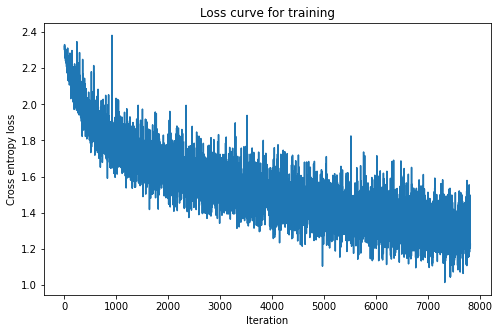

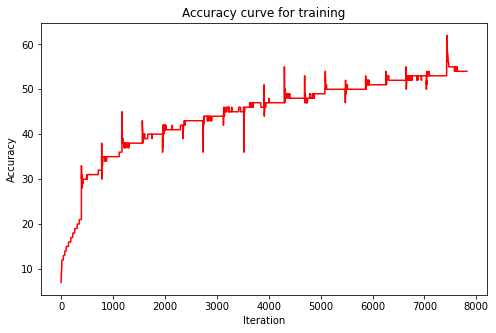

In [48]:
#Plots the loss and accuracy curves

plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("Cross entropy loss")
plt.title("Loss curve for training")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(train_accuracy)), train_accuracy, c='r')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy curve for training")
plt.show()

In [49]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network_pytorch_E_l2.pkl')# only save parameters

## L1 regularization

### Model C: 3 Hidden Layers Feedforward Neural Network (ReLU and LeakyReLU Activation functions)

#### Make dataset iterable

In [50]:
batch_size = 128
n_iters = 8000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [51]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False) # create your dataloader

### Create model class

In [52]:
class FeedforwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2,hidden_size3, num_classes):
        super(FeedforwardNeuralNetworkModel, self).__init__()
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # non-linearity 1
        self.relu1 = nn.LeakyReLU()
        
        # linear function 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # non-linearity 2
        self.relu2 = nn.LeakyReLU()
        
        # linear function 3
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        # non-linearity 3
        self.relu3 = nn.ReLU()
        
        # linear function 4 (readout)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non-linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non-linearity 2
        out = self.relu2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non-linearity 3
        out = self.relu3(out)
        
        #linear function 4 (readout)
        out = self.fc4(out)
        return out       
    

In [53]:
#  Instantiate model class
input_dim = 3*32*32
output_dim = 10
hidden_dim1 = 700
hidden_dim2 = 1200
hidden_dim3 = 512 

model = FeedforwardNeuralNetworkModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()
    

In [54]:
summary(model, (1,3*32*32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 700]       2,151,100
         LeakyReLU-2               [-1, 1, 700]               0
            Linear-3              [-1, 1, 1200]         841,200
         LeakyReLU-4              [-1, 1, 1200]               0
            Linear-5               [-1, 1, 512]         614,912
              ReLU-6               [-1, 1, 512]               0
            Linear-7                [-1, 1, 10]           5,130
Total params: 3,612,342
Trainable params: 3,612,342
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 13.78
Estimated Total Size (MB): 13.83
----------------------------------------------------------------


In [55]:
#  Instantiate loss class
criterion=nn.CrossEntropyLoss()

#  Instantiate optimizer class
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Train the model with L1 regularization

In [56]:
# Train the model

LAMBDA = 0.009
train_loss = []
train_accuracy = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    # Calculate Accuracy         
    correct_1 = 0
    total_1 = 0
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 3*32*32).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        '''
        Save accuracy to draw accuracy curve
        '''
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
                
        # Total number of labels
        total_1 += labels.size(0)
           
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        # Total correct predictions
        if torch.cuda.is_available():
                    correct_1 += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
        else:                
                    correct_1 += (predicted == labels).sum()
            
        accuracy = 100 * correct_1 // total_1
        train_accuracy.append(accuracy)
        ''''''
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        '''
        L1 regularization
        '''
        l1_regularization = torch.tensor(0).long().cuda()
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1).long().cuda()
            
        loss += LAMBDA * l1_regularization
        
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 3*32*32).cuda())
                else:
                    images = Variable(images.view(-1, 3*32*32))    
                    
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500. Loss: 400.22027587890625. Accuracy: 37
Iteration: 1000. Loss: 400.10601806640625. Accuracy: 42
Iteration: 1500. Loss: 400.13360595703125. Accuracy: 40
Iteration: 2000. Loss: 399.9342956542969. Accuracy: 45
Iteration: 2500. Loss: 400.0439758300781. Accuracy: 47
Iteration: 3000. Loss: 399.9835510253906. Accuracy: 46
Iteration: 3500. Loss: 400.1443786621094. Accuracy: 48
Iteration: 4000. Loss: 400.06329345703125. Accuracy: 47
Iteration: 4500. Loss: 400.13555908203125. Accuracy: 45
Iteration: 5000. Loss: 400.33807373046875. Accuracy: 48
Iteration: 5500. Loss: 400.2391357421875. Accuracy: 48
Iteration: 6000. Loss: 400.44732666015625. Accuracy: 50
Iteration: 6500. Loss: 400.34564208984375. Accuracy: 48
Iteration: 7000. Loss: 400.4817199707031. Accuracy: 51
Iteration: 7500. Loss: 400.4938659667969. Accuracy: 51


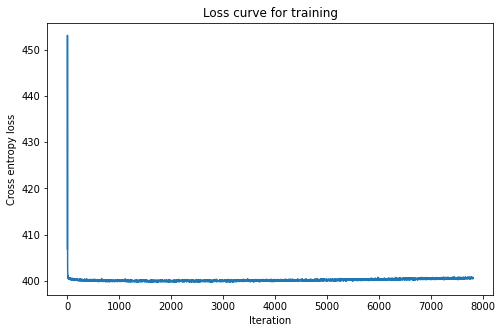

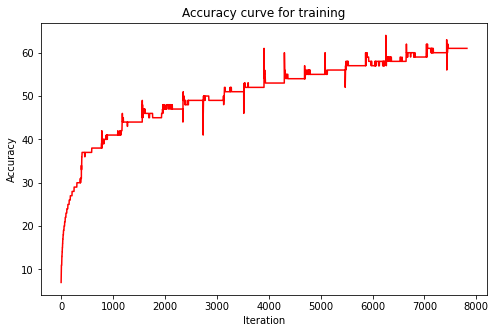

In [57]:
#Plots the loss and accuracy curves

plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("Cross entropy loss")
plt.title("Loss curve for training")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(train_accuracy)), train_accuracy, c='r')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy curve for training")
plt.show()

In [58]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network_pytorch_C_l1.pkl')# only save parameters

### Model D: 3 Hidden Layers Feedforward Neural Network

#### Make dataset iterable

In [59]:
batch_size = 128
n_iters = 8000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [60]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False) # create your dataloader

### Create model class

In [61]:
class FeedforwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2,hidden_size3, num_classes):
        super(FeedforwardNeuralNetworkModel, self).__init__()
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # non-linearity 1
        self.relu1 = nn.LeakyReLU()
        
        # linear function 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # non-linearity 2
        self.relu2 = nn.LeakyReLU()
        
        # linear function 3
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        # non-linearity 3
        self.relu3 = nn.LeakyReLU()
        
        # linear function 4 (readout) 
        self.fc4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non-linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non-linearity 2
        out = self.relu2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non-linearity 3
        out = self.relu3(out)
        
        #linear function 4 (readout)
        out = self.fc4(out)
        return out       
    

In [62]:
#  Instantiate model class
input_dim = 3*32*32
output_dim = 10
hidden_dim1 = 1530
hidden_dim2 = 768
hidden_dim3 = 384 

model = FeedforwardNeuralNetworkModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()
    

In [63]:
summary(model, (1,3*32*32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1530]       4,701,690
         LeakyReLU-2              [-1, 1, 1530]               0
            Linear-3               [-1, 1, 768]       1,175,808
         LeakyReLU-4               [-1, 1, 768]               0
            Linear-5               [-1, 1, 384]         295,296
         LeakyReLU-6               [-1, 1, 384]               0
            Linear-7                [-1, 1, 10]           3,850
Total params: 6,176,644
Trainable params: 6,176,644
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 23.56
Estimated Total Size (MB): 23.61
----------------------------------------------------------------


In [64]:
#  Instantiate loss class
criterion=nn.CrossEntropyLoss()

#  Instantiate optimizer class
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Train the model with L1 regularization

In [65]:
# Train the model

LAMBDA = 0.001
train_loss = []
train_accuracy = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    # Calculate Accuracy         
    correct_1 = 0
    total_1 = 0
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 3*32*32).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        '''
        Save accuracy to draw accuracy curve
        '''
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
                
        # Total number of labels
        total_1 += labels.size(0)
           
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        # Total correct predictions
        if torch.cuda.is_available():
                    correct_1 += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
        else:                
                    correct_1 += (predicted == labels).sum()
            
        accuracy = 100 * correct_1 // total_1
        train_accuracy.append(accuracy)
        ''''''
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        '''
        L1 regularization
        '''
        l1_regularization = torch.tensor(0).long().cuda()
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1).long().cuda()
            
        loss += LAMBDA * l1_regularization
        
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 3*32*32).cuda())
                else:
                    images = Variable(images.view(-1, 3*32*32))    
                    
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500. Loss: 64.3675537109375. Accuracy: 38
Iteration: 1000. Loss: 64.34565734863281. Accuracy: 41
Iteration: 1500. Loss: 64.22207641601562. Accuracy: 44
Iteration: 2000. Loss: 64.21863555908203. Accuracy: 46
Iteration: 2500. Loss: 64.41867065429688. Accuracy: 48
Iteration: 3000. Loss: 64.14665222167969. Accuracy: 48
Iteration: 3500. Loss: 64.11746215820312. Accuracy: 48
Iteration: 4000. Loss: 64.37153625488281. Accuracy: 48
Iteration: 4500. Loss: 64.01486206054688. Accuracy: 50
Iteration: 5000. Loss: 64.28598022460938. Accuracy: 49
Iteration: 5500. Loss: 64.10051727294922. Accuracy: 50
Iteration: 6000. Loss: 64.27713775634766. Accuracy: 47
Iteration: 6500. Loss: 64.07916259765625. Accuracy: 49
Iteration: 7000. Loss: 64.09095764160156. Accuracy: 50
Iteration: 7500. Loss: 63.87547302246094. Accuracy: 51


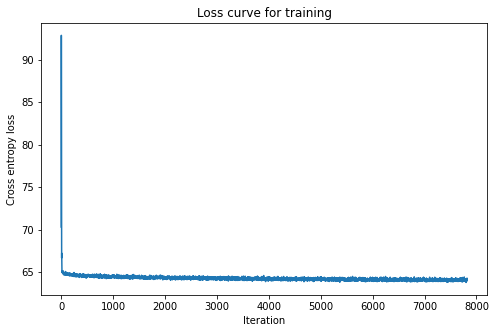

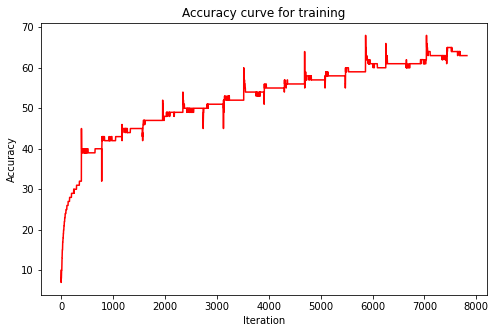

In [66]:
#Plots the loss and accuracy curves

plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("Cross entropy loss")
plt.title("Loss curve for training")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(train_accuracy)), train_accuracy, c='r')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy curve for training")
plt.show()

In [67]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network_pytorch_D_l1.pkl')# only save parameters

##  Data Augmentation

It must be noted that by using the dataset that was loaded manually and because of the large size of the training set, I encontered some problems with data augmentation, e.g., program execution speed after preparing the data for augmentation.

So for this part, intentionally, I have loaded the dataset from the library. 

In [68]:
import torch
import torchvision
import torchvision.transforms as transforms
import PIL


train_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.RandomRotation(degrees=80),
    #transforms.RandomCrop(size=(30, 30)),
    transforms.ColorJitter(hue=.05, saturation=.05),
    transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(10, resample=PIL.Image.BILINEAR),
    #transforms.RandomAffine(degrees=(-20, 20), translate=(0.2, 0.2),
    #                                    resample=PIL.Image.BILINEAR),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


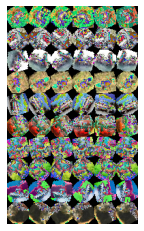

In [69]:
def show_dataset(dataset, n=6):
        img = np.vstack((np.hstack((np.asarray(transforms.functional.to_pil_image(dataset[i][0])) for _ in range(n)))
                   for i in range(10)))
        plt.imshow(img)
        plt.axis('off')
        
show_dataset(trainset)

### Model C: 3 Hidden Layers Feedforward Neural Network (ReLU and LeakyReLU Activation functions)

#### Make dataset iterable

In [70]:
batch_size = 128
n_iters = 8000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [71]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

### Create model class

In [72]:
class FeedforwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2,hidden_size3, num_classes):
        super(FeedforwardNeuralNetworkModel, self).__init__()
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # non-linearity 1
        self.relu1 = nn.LeakyReLU()
        
        # linear function 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # non-linearity 2
        self.relu2 = nn.LeakyReLU()
        
        # linear function 3
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        # non-linearity 3
        self.relu3 = nn.ReLU()
        
        # linear function 4 (readout)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non-linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non-linearity 2
        out = self.relu2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non-linearity 3
        out = self.relu3(out)
        
        #linear function 4 (readout)
        out = self.fc4(out)
        return out       
    

In [73]:
#  Instantiate model class
input_dim = 3*32*32
output_dim = 10
hidden_dim1 = 700
hidden_dim2 = 1200
hidden_dim3 = 512 

model = FeedforwardNeuralNetworkModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()
    

In [74]:
summary(model, (1,3*32*32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 700]       2,151,100
         LeakyReLU-2               [-1, 1, 700]               0
            Linear-3              [-1, 1, 1200]         841,200
         LeakyReLU-4              [-1, 1, 1200]               0
            Linear-5               [-1, 1, 512]         614,912
              ReLU-6               [-1, 1, 512]               0
            Linear-7                [-1, 1, 10]           5,130
Total params: 3,612,342
Trainable params: 3,612,342
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 13.78
Estimated Total Size (MB): 13.83
----------------------------------------------------------------


In [75]:
#  Instantiate loss class
criterion=nn.CrossEntropyLoss()

#  Instantiate optimizer class
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [76]:
# Train the model

LAMBDA = 0.009
train_loss = []
train_accuracy = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    # Calculate Accuracy         
    correct_1 = 0
    total_1 = 0
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 3*32*32).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        '''
        Save accuracy to draw accuracy curve
        '''
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
                
        # Total number of labels
        total_1 += labels.size(0)
           
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        # Total correct predictions
        if torch.cuda.is_available():
                    correct_1 += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
        else:                
                    correct_1 += (predicted == labels).sum()
            
        accuracy = 100 * correct_1 // total_1
        train_accuracy.append(accuracy)
        ''''''
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 3*32*32).cuda())
                else:
                    images = Variable(images.view(-1, 3*32*32))    
                    
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500. Loss: 1.8040169477462769. Accuracy: 39
Iteration: 1000. Loss: 1.7335195541381836. Accuracy: 38
Iteration: 1500. Loss: 1.3407562971115112. Accuracy: 43
Iteration: 2000. Loss: 1.4853100776672363. Accuracy: 44
Iteration: 2500. Loss: 1.521358609199524. Accuracy: 45
Iteration: 3000. Loss: 1.426431655883789. Accuracy: 44
Iteration: 3500. Loss: 1.3907852172851562. Accuracy: 48
Iteration: 4000. Loss: 1.3635752201080322. Accuracy: 48
Iteration: 4500. Loss: 1.1789870262145996. Accuracy: 48
Iteration: 5000. Loss: 1.3886337280273438. Accuracy: 48
Iteration: 5500. Loss: 1.2441470623016357. Accuracy: 50
Iteration: 6000. Loss: 1.1066617965698242. Accuracy: 50
Iteration: 6500. Loss: 1.0264497995376587. Accuracy: 51
Iteration: 7000. Loss: 1.1802384853363037. Accuracy: 51
Iteration: 7500. Loss: 1.4485294818878174. Accuracy: 46


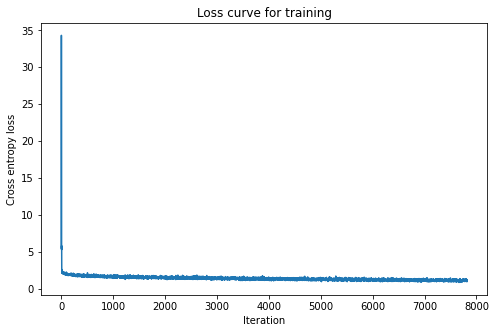

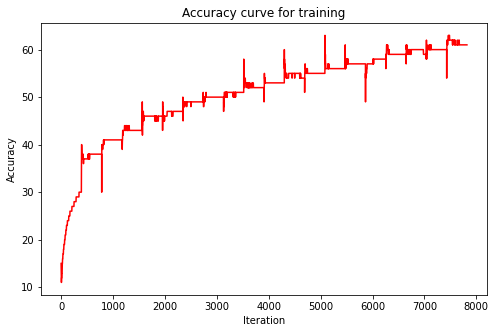

In [77]:
#Plots the loss and accuracy curves

plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("Cross entropy loss")
plt.title("Loss curve for training")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(train_accuracy)), train_accuracy, c='r')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy curve for training")
plt.show()

In [78]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network_pytorch_C_aug.pkl')# only save parameters

### Model D: 3 Hidden Layers Feedforward Neural Network

In [79]:
train_transforms = transforms.Compose([
    #transforms.RandomRotation(degrees=20),
    #transforms.RandomRotation(degrees=50),
    #transforms.RandomCrop(size=(30, 30)),
    #transforms.ColorJitter(hue=.02, saturation=.05),
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(10, resample=PIL.Image.BILINEAR),
    transforms.RandomAffine(degrees=(-20, 20), translate=(0.2, 0.2),
                                        resample=PIL.Image.BILINEAR),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)


Files already downloaded and verified
Files already downloaded and verified


#### Make dataset iterable

In [80]:
batch_size = 128
n_iters = 8000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [81]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

### Create model class

In [82]:
class FeedforwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2,hidden_size3, num_classes):
        super(FeedforwardNeuralNetworkModel, self).__init__()
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # non-linearity 1
        self.relu1 = nn.LeakyReLU()
        
        # linear function 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # non-linearity 2
        self.relu2 = nn.LeakyReLU()
        
        # linear function 3
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        # non-linearity 3
        self.relu3 = nn.LeakyReLU()
        
        # linear function 4 (readout) 
        self.fc4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non-linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non-linearity 2
        out = self.relu2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non-linearity 3
        out = self.relu3(out)
        
        #linear function 4 (readout)
        out = self.fc4(out)
        return out       
    

In [83]:
#  Instantiate model class
input_dim = 3*32*32
output_dim = 10
hidden_dim1 = 1530
hidden_dim2 = 768
hidden_dim3 = 384 

model = FeedforwardNeuralNetworkModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()
    

In [84]:
summary(model, (1,3*32*32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1530]       4,701,690
         LeakyReLU-2              [-1, 1, 1530]               0
            Linear-3               [-1, 1, 768]       1,175,808
         LeakyReLU-4               [-1, 1, 768]               0
            Linear-5               [-1, 1, 384]         295,296
         LeakyReLU-6               [-1, 1, 384]               0
            Linear-7                [-1, 1, 10]           3,850
Total params: 6,176,644
Trainable params: 6,176,644
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 23.56
Estimated Total Size (MB): 23.61
----------------------------------------------------------------


In [85]:
#  Instantiate loss class
criterion=nn.CrossEntropyLoss()

#  Instantiate optimizer class
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [86]:
# Train the model

train_loss = []
train_accuracy = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    # Calculate Accuracy         
    correct_1 = 0
    total_1 = 0
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 3*32*32).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        '''
        Save accuracy to draw accuracy curve
        '''
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
                
        # Total number of labels
        total_1 += labels.size(0)
           
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        # Total correct predictions
        if torch.cuda.is_available():
                    correct_1 += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
        else:                
                    correct_1 += (predicted == labels).sum()
            
        accuracy = 100 * correct_1 // total_1
        train_accuracy.append(accuracy)
        ''''''
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 3*32*32).cuda())
                else:
                    images = Variable(images.view(-1, 3*32*32))    
                    
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500. Loss: 1.5296552181243896. Accuracy: 39
Iteration: 1000. Loss: 1.5569623708724976. Accuracy: 41
Iteration: 1500. Loss: 1.6221648454666138. Accuracy: 45
Iteration: 2000. Loss: 1.4040428400039673. Accuracy: 45
Iteration: 2500. Loss: 1.4353532791137695. Accuracy: 47
Iteration: 3000. Loss: 1.387910008430481. Accuracy: 48
Iteration: 3500. Loss: 1.297793984413147. Accuracy: 48
Iteration: 4000. Loss: 1.051720142364502. Accuracy: 48
Iteration: 4500. Loss: 1.198326826095581. Accuracy: 46
Iteration: 5000. Loss: 1.552385687828064. Accuracy: 46
Iteration: 5500. Loss: 1.1991651058197021. Accuracy: 49
Iteration: 6000. Loss: 1.1282457113265991. Accuracy: 49
Iteration: 6500. Loss: 1.2680078744888306. Accuracy: 49
Iteration: 7000. Loss: 1.0917590856552124. Accuracy: 49
Iteration: 7500. Loss: 1.0053513050079346. Accuracy: 50


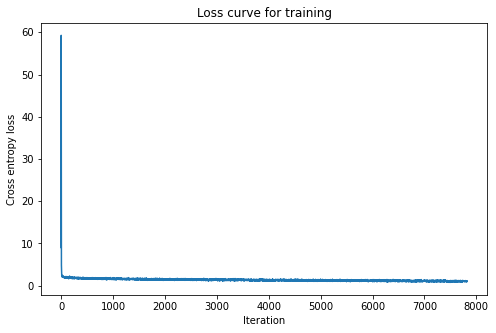

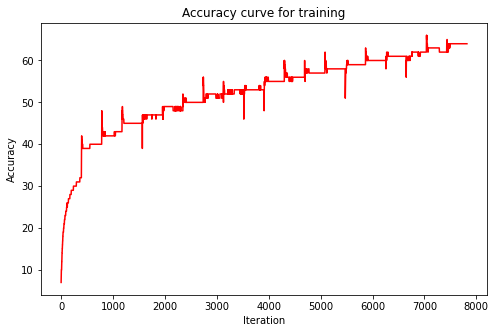

In [87]:
#Plots the loss and accuracy curves

plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("Cross entropy loss")
plt.title("Loss curve for training")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(train_accuracy)), train_accuracy, c='r')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy curve for training")
plt.show()

In [88]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network_pytorch_D_aug.pkl')# only save parameters